# 1. Load CATPCHA images and get the transformed (X,y) data

In [1]:
import torch

from helper_functions.data_transformation import get_transformed_data_v1_proportionate, get_transformed_data_for_captcha_evaluation_v1_proportionate

train_folder = "../data/train/combine2"
test_folder = "../data/test/combine2"
cached_data_path = "../data/prepared_data_cnn_v3.4_proportionate.pth"

try:
    # Load the prepared data from cache if it already exists
    X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info = torch.load(cached_data_path)
    print("Loaded prepared data from cache.")

except FileNotFoundError:
    # Else prepare the data and save it
    X_train, y_train = get_transformed_data_v1_proportionate(train_folder, is_train=True)
    X_test, y_test = get_transformed_data_v1_proportionate(test_folder, is_train=False)
    X_test_captcha, y_test_captcha, failed_segmentation_info = get_transformed_data_for_captcha_evaluation_v1_proportionate(test_folder)

    torch.save((X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info), cached_data_path)
    print("Saved prepared data to cache.")


c:\Users\ongka\scoop\apps\python\current\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Loaded prepared data from cache.


# 2. Instantiate RESNET Model


In [2]:
from models.resnet import ResNet50, CNNParams
from helper_functions.data_transformation import IMG_HEIGHT, IMG_WIDTH

# Train model
cached_model_path = "../trained_models/resnet50_v1_proportionate.pth"

resnet = None

cnn_params: CNNParams = {
    "num_classes": 36,
    "input_shape": (1, IMG_HEIGHT, IMG_WIDTH), # (channels, height, width)
    "learning_rate": 1.1*1e-3,
    "num_epochs": 20,
    "batch_size": 500,
}

try:
    # Load the trained model from cache if it already exists
    resnet = torch.load(cached_model_path)
    print("Loaded trained model from cache.")
except FileNotFoundError:
    # Else train the model and save it
    resnet = ResNet50(cnn_params)
    resnet.train_model(X_train, y_train)
    torch.save(resnet, cached_model_path)
    print("Saved trained model to cache.")


  5%|▌         | 1/20 [13:31<4:17:02, 811.72s/it]

Epoch [1/20], Loss: 0.7708


 10%|█         | 2/20 [28:42<4:20:57, 869.89s/it]

Epoch [2/20], Loss: 0.3319


 15%|█▌        | 3/20 [42:43<4:02:47, 856.94s/it]

Epoch [3/20], Loss: 0.2418


 20%|██        | 4/20 [57:16<3:50:12, 863.30s/it]

Epoch [4/20], Loss: 0.2031


 25%|██▌       | 5/20 [1:09:17<3:22:55, 811.68s/it]

Epoch [5/20], Loss: 0.1792


 30%|███       | 6/20 [1:20:48<2:59:51, 770.81s/it]

Epoch [6/20], Loss: 0.1389


 35%|███▌      | 7/20 [1:32:14<2:41:00, 743.09s/it]

Epoch [7/20], Loss: 0.1187


 40%|████      | 8/20 [1:43:20<2:23:43, 718.64s/it]

Epoch [8/20], Loss: 0.1152


 45%|████▌     | 9/20 [1:54:15<2:08:05, 698.67s/it]

Epoch [9/20], Loss: 0.0980


 50%|█████     | 10/20 [2:05:09<1:54:07, 684.80s/it]

Epoch [10/20], Loss: 0.0954


 55%|█████▌    | 11/20 [2:15:54<1:40:54, 672.77s/it]

Epoch [11/20], Loss: 0.0945


 60%|██████    | 12/20 [2:26:44<1:28:45, 665.63s/it]

Epoch [12/20], Loss: 0.0803


 65%|██████▌   | 13/20 [2:37:31<1:17:01, 660.19s/it]

Epoch [13/20], Loss: 0.0672


 70%|███████   | 14/20 [10:03:14<14:13:50, 8538.41s/it]

Epoch [14/20], Loss: 0.0611


 75%|███████▌  | 15/20 [10:15:22<8:35:20, 6184.01s/it] 

Epoch [15/20], Loss: 0.0748


 80%|████████  | 16/20 [10:27:42<5:03:02, 4545.55s/it]

Epoch [16/20], Loss: 0.0650


 85%|████████▌ | 17/20 [10:39:54<2:49:55, 3398.57s/it]

Epoch [17/20], Loss: 0.0486


 90%|█████████ | 18/20 [10:52:10<1:26:37, 2598.52s/it]

Epoch [18/20], Loss: 0.0521


 95%|█████████▌| 19/20 [11:04:27<33:59, 2039.65s/it]  

Epoch [19/20], Loss: 0.0570


100%|██████████| 20/20 [11:16:31<00:00, 2029.56s/it]

Epoch [20/20], Loss: 0.0495
Training complete!
Saved trained model to cache.


# 3. Evaluate model

Character level performance (skipping SF): {
  "accuracy": 0.918,
  "precision": 0.919,
  "recall": 0.917,
  "f1_score": 0.917
}

Captcha level performance: {
  "segmentation_accuracy": 0.934,
  "captcha_accuracy (skipping SF)": 0.681,
  "captcha_accuracy (including SF)": 0.636,
  "character_accuracy (including SF)": 0.858
}

Confusion matrix for individual characters (skipping SF):


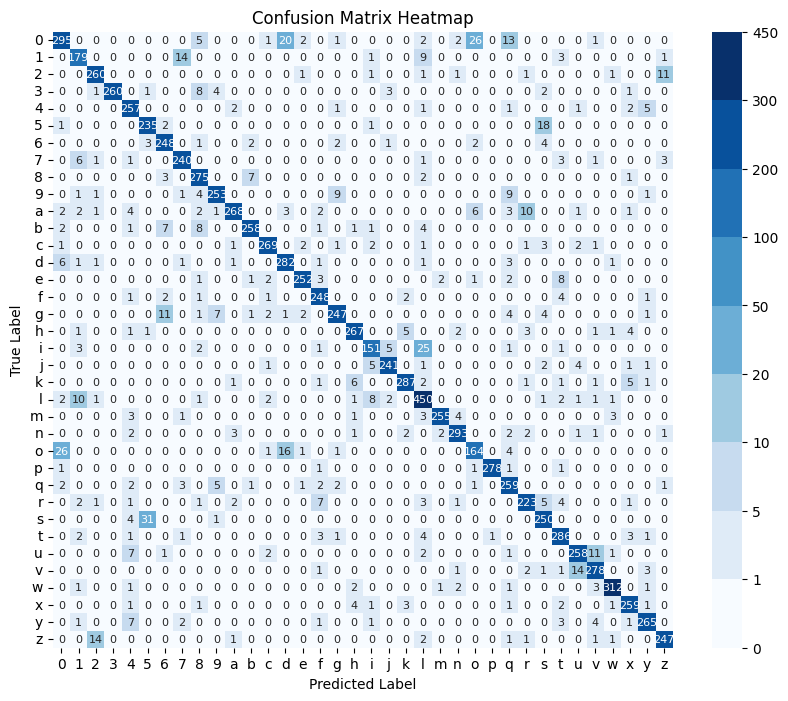

Individual character performance and top confusions (skipping SF):


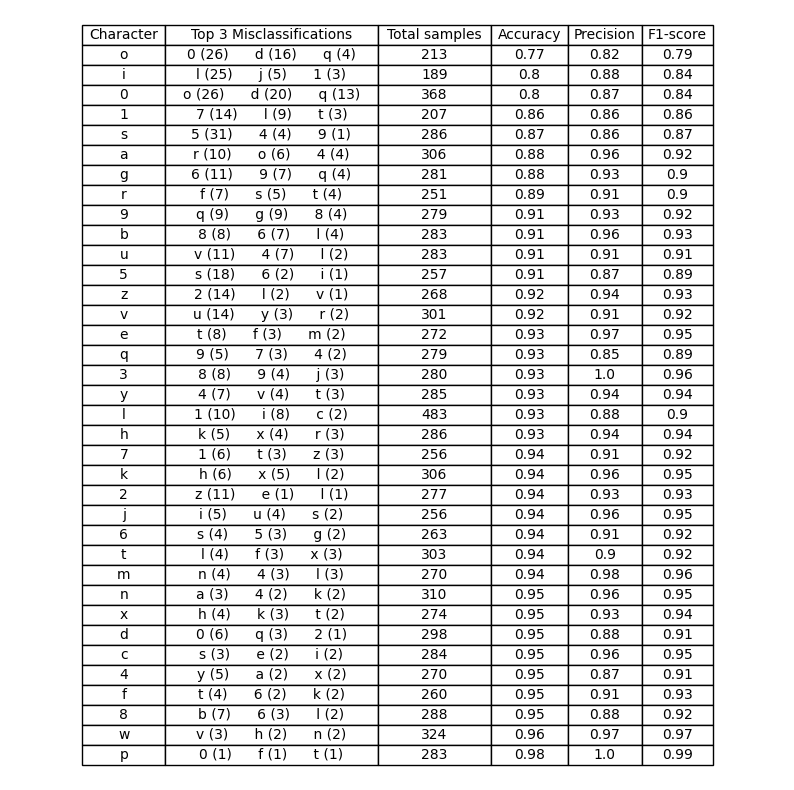

In [4]:
from helper_functions.evaluation import evaluate_character_performance, evaluate_captcha_performance, evaluate_individual_character_performance

evaluate_character_performance(resnet, X_test, y_test)
evaluate_captcha_performance(resnet, X_test_captcha, y_test_captcha, failed_segmentation_info)
evaluate_individual_character_performance(resnet, X_test, y_test)